Analysis
~ Trend 1: Significantly more rides from Urban Area
~ Trend 2: Rural and Suburban areas tended to have higher average fares
~ Trend 3: Significantly more drivers in Urban Area

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Pathways
root = os.getcwd()
matplot = os.path.join(root , "05-Matplotlib")
instruct = os.path.join(matplot , "Instructions")
pyber = os.path.join(instruct , "Pyber")
raw = os.path.join(pyber , "raw_data")
city_data = os.path.join(raw , "city_data.csv")
ride_data = os.path.join(raw , "ride_data.csv")

In [4]:
# Store dataframe
city = pd.read_csv(city_data)
ride = pd.read_csv(ride_data)
city = city.drop(100) # Removed data due to duplicate of the city "Port James"

In [5]:
# Combine 2 df into 1
comb = pd.DataFrame.merge(ride,city,on='city')

In [6]:
# Basic info for bubbleplot
avg_fare = comb.groupby(['city']).mean()['fare']
total_ride = comb['city'].value_counts()
total_driver = city.set_index('city')['driver_count']
city_type = city.set_index('city')['type']
df = pd.DataFrame({'Avg_Fare': avg_fare,
                  'Total_ride': total_ride})
df = df.join(total_driver)
df = df.join(city_type)
df = df.replace('Urban',0)
df = df.replace('Rural',1)
df = df.replace('Suburban',2)
urban = df[df['type'] == 0]
rural = df[df['type'] == 1]
suburban = df[df['type'] == 2]

In [48]:
# Bubbleplot
# plt.scatter(df['Total_ride'],df['Avg_Fare'],s=df['driver_count']*2.5,c=df['type'],marker='o',edgecolor='black')
# plt.title('Pyber Ride Sharing Data (2016)')
# plt.xlabel('Total Number of Rides (Per City)')
# plt.ylabel('Average Fares ($)')
# plt.grid()
# plt.show()

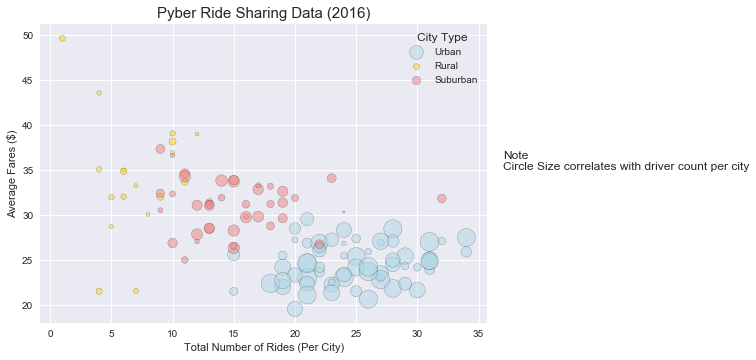

In [50]:
# Bubbleplot
plt.scatter(urban['Total_ride'],urban['Avg_Fare'],s=urban['driver_count'] * 5,color='lightblue',edgecolor='black',label='Urban',marker='o',alpha=0.5)
plt.scatter(rural['Total_ride'],rural['Avg_Fare'],s=rural['driver_count'] * 5,color='gold',edgecolor='black',label='Rural',marker='o',alpha=0.5)
plt.scatter(suburban['Total_ride'],suburban['Avg_Fare'],s=suburban['driver_count'] * 5,color='lightcoral',edgecolor='black',label='Suburban',marker='o',alpha=0.5)
plt.title('Pyber Ride Sharing Data (2016)',fontsize=15)
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fares ($)')
plt.legend(loc=1,title='City Type',scatterpoints=1,markerscale=1,frameon=False)
sns.set()
plt.text(37, 35, "Note\nCircle Size correlates with driver count per city")
plt.show()

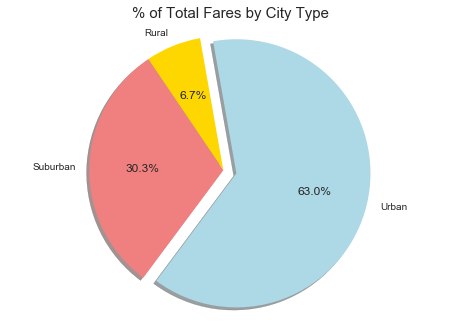

In [22]:
# Total Fares
total_fares = pd.DataFrame({'Fare': comb.groupby('type').sum()['fare']})
total_fares = total_fares.reset_index()
labels = total_fares['type']
sizes = total_fares['Fare']
colors = ['gold','lightcoral','lightblue']
explode = (0,0,0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%.1f%%", shadow=True, startangle=100)
plt.title('% of Total Fares by City Type',fontsize=15)
plt.axis('equal')
plt.show()

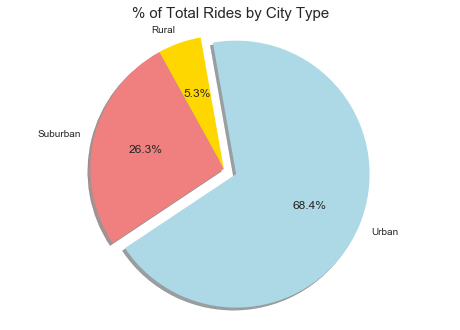

In [23]:
# Total rides
total_rides = pd.DataFrame({'Rides': comb['type'].value_counts()})
total_rides = total_rides.reset_index()
total_rides = total_rides.sort_values('index')
labels = total_rides['index']
sizes = total_rides['Rides']
colors = ['gold','lightcoral','lightblue']
explode = (0,0,0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%.1f%%", shadow=True, startangle=100)
plt.title('% of Total Rides by City Type',fontsize=15)
plt.axis('equal')
plt.show()

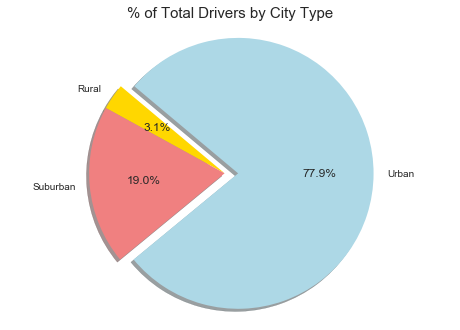

In [13]:
# Total Driver
total_drivers = pd.DataFrame({'Driver': city.groupby('type').sum()['driver_count']})
total_drivers = total_drivers.reset_index()
labels = total_drivers['type']
sizes = total_drivers['Driver']
colors = ['gold','lightcoral','lightblue']
explode = (0,0,0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%.1f%%", shadow=True, startangle=140)
plt.title('% of Total Drivers by City Type',fontsize=15)
plt.axis('equal')
plt.show()